# Statistics and figures

## How many tasks per number of keywords

In [1]:
import pandas as pd

In [2]:
file_keywords = "../data/neural_network_y.csv"
df = pd.read_csv(file_keywords)

# count number of keywords used per task, by adding an extra column
numeric_cols = df.select_dtypes(include="number")
df["row_sum"] = numeric_cols.sum(axis=1)
df = df.sort_values(by="row_sum", ascending=True)

for i in range(0, 11) :
    df_s = df[df["row_sum"] == i]
    task_names = df_s["task_id"].values
    print("For %d keywords, found a total of %d tasks: %s" % (i, df_s.shape[0], str(task_names)))

For 0 keywords, found a total of 0 tasks: []
For 1 keywords, found a total of 0 tasks: []
For 2 keywords, found a total of 7 tasks: ['67a3c6ac' 'a416b8f3' '68b16354' 'ed36ccf7' '6150a2bd' '74dd1130'
 '3c9b0459']
For 3 keywords, found a total of 8 tasks: ['8be77c9e' 'c59eb873' 'c9e6f938' '6fa7a44f' '6d0aefbc' '4c4377d9'
 '9172f3a0' '7468f01a']
For 4 keywords, found a total of 8 tasks: ['b1948b0a' 'b91ae062' '5582e5ca' 'f25fbde4' 'd511f180' '2dee498d'
 'd10ecb37' 'c8f0f002']
For 5 keywords, found a total of 6 tasks: ['62c24649' '8d5021e8' '6f8cd79b' 'c1d99e64' '3af2c5a8' '67e8384a']
For 6 keywords, found a total of 6 tasks: ['25ff71a9' '5bd6f4ac' '28bf18c6' '46442a0e' '46f33fce' '7fe24cdd']
For 7 keywords, found a total of 5 tasks: ['dc1df850' '60b61512' 'a740d043' '7b7f7511' '6d75e8bb']
For 8 keywords, found a total of 12 tasks: ['42a50994' '3aa6fb7a' '9565186b' '88a62173' '4258a5f9' '0b148d64'
 'd631b094' 'ac0a08a4' 'f76d97a5' 'a79310a0' 'e9614598' '56ff96f3']
For 9 keywords, found a t

# Figure for task failures

In [43]:
import matplotlib.pyplot as plt
import pandas as pd
import re as regex
import seaborn as sns

sns.set_style('darkgrid')

In [90]:
# hard-coded values
data_file = "../local/run_pto_experiments_server_ns/all_tasks_summary.csv"
algorithms = ["RS", "HC", "GA"]
column_training_failure = "_not_zero_training"
column_test_failure = "_not_global_optimum"

# this has been extracted by ChatGPT, double check it; task_id -> [length, log prob]
task_complexity = {
    "74dd1130": [10, -2.24],
    "67a3c6ac": [10, -2.58],
    "3c9b0459": [9, -2.60],
    "6150a2bd": [9, -2.60],
    "ed36ccf7": [9, -2.66],
    "5582e5ca": [30, -2.70],
    "68b16354": [10, -2.88],
    "9172f3a0": [17, -3.13],
    "c59eb873": [15, -3.13],
    "f25fbde4": [25, -3.13],
    "d511f180": [22, -3.17],
    "6fa7a44f": [22, -3.17],
    "8be77c9e": [22, -3.17],
    "a416b8f3": [13, -3.19],
    "6f8cd79b": [33, -3.22],
    "c1d99e64": [33, -3.33],
    "b1948b0a": [20, -3.43],
    "c8f0f002": [23, -3.43],
    "d10ecb37": [27, -3.70],
    "6d0aefbc": [22, -3.71],
    "c9e6f938": [22, -3.71],
    "4c4377d9": [22, -3.77],
    "7468f01a": [20, -3.82],
    "b91ae062": [35, -4.40],
    "3af2c5a8": [64, -6.09],
    "62c24649": [64, -6.09],
    "67e8384a": [64, -6.09],
    "2dee498d": [23, -6.85],
}

# load data
df = pd.read_csv(data_file)
print(df)

     task_id  n_keywords RS_exception_frequency_mean  \
0   2dee498d         4.0                 0.80 (0.00)   
1   3af2c5a8         5.0                 0.79 (0.00)   
2   3c9b0459         2.0                 0.78 (0.09)   
3   4c4377d9         3.0                 0.79 (0.01)   
4   5582e5ca         4.0                 0.81 (0.03)   
5   6150a2bd         2.0                 0.80 (0.03)   
6   62c24649         5.0                 0.79 (0.00)   
7   67a3c6ac         2.0                 0.79 (0.03)   
8   67e8384a         5.0                 0.79 (0.00)   
9   68b16354         2.0                 0.78 (0.06)   
10  6d0aefbc         3.0                 0.79 (0.01)   
11  6f8cd79b         5.0                 0.80 (0.01)   
12  6fa7a44f         3.0                 0.79 (0.02)   
13  7468f01a         3.0                 0.79 (0.01)   
14  74dd1130         2.0                 0.74 (0.08)   
15  8be77c9e         3.0                 0.79 (0.03)   
16  9172f3a0         3.0                 0.79 (0

In [91]:
# find all tasks for which there was at least one training failure for one algorithm
columns_failure = [a + column_training_failure for a in algorithms]
columns = ["task_id", "n_keywords"] + columns_failure

task_failure_ids = []
for index, row in df.iterrows() :
    failure_found = False
    for c in columns_failure :
        tokens = row[c].split('/')
        #print(row[c] + ":" + tokens[0])
        if tokens[0] != "\"0" :
            failure_found = True
            #print("Failure found!")

    if failure_found :
        task_failure_ids.append(row["task_id"])

print("Found a total of %d failures: %s" % (len(task_failure_ids), task_failure_ids))


Found a total of 3 failures: ['3af2c5a8', '62c24649', '67e8384a']


In [92]:
# select all tasks with failures in training
df_selected = df[df["task_id"].isin(task_failure_ids)]

# we can prepare another dataframe so that Seaborn can digest it more easily
dict_sns = {'task_id' : [], 'algorithm' : [], 'failures': []}
for index, row in df_selected.iterrows() :
    task_id = row["task_id"]
    for a in algorithms :
        c = a + column_training_failure
        failures = regex.search("\"([0-9]+)\\/", row[c]).group(1)
        dict_sns['task_id'].append(task_id + "\n(training)")
        dict_sns['algorithm'].append(a)
        dict_sns['failures'].append(float(int(failures)/30))

In [93]:
# actually, before running a plot, let's do data collection again, but for test failures
for index, row in df.iterrows() :
    task_id = row["task_id"]
    failure_found = False
    for a in algorithms :
        failures = regex.search("\"([0-9]+)\/", row[a + column_test_failure]).group(1)
        if int(failures) > 0 :
            failure_found = True

    if failure_found :
        for a in algorithms :
            c = a + column_test_failure
            failures = regex.search("\"([0-9]+)\\/", row[c]).group(1)
            dict_sns['task_id'].append(task_id + "\n(test)")
            dict_sns['algorithm'].append(a)
            dict_sns['failures'].append(float(int(failures)/30))

C:\Users\Alberto\AppData\Local\Temp\ipykernel_72648\2036436080.py:21: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(new_xlabels, fontsize=7)


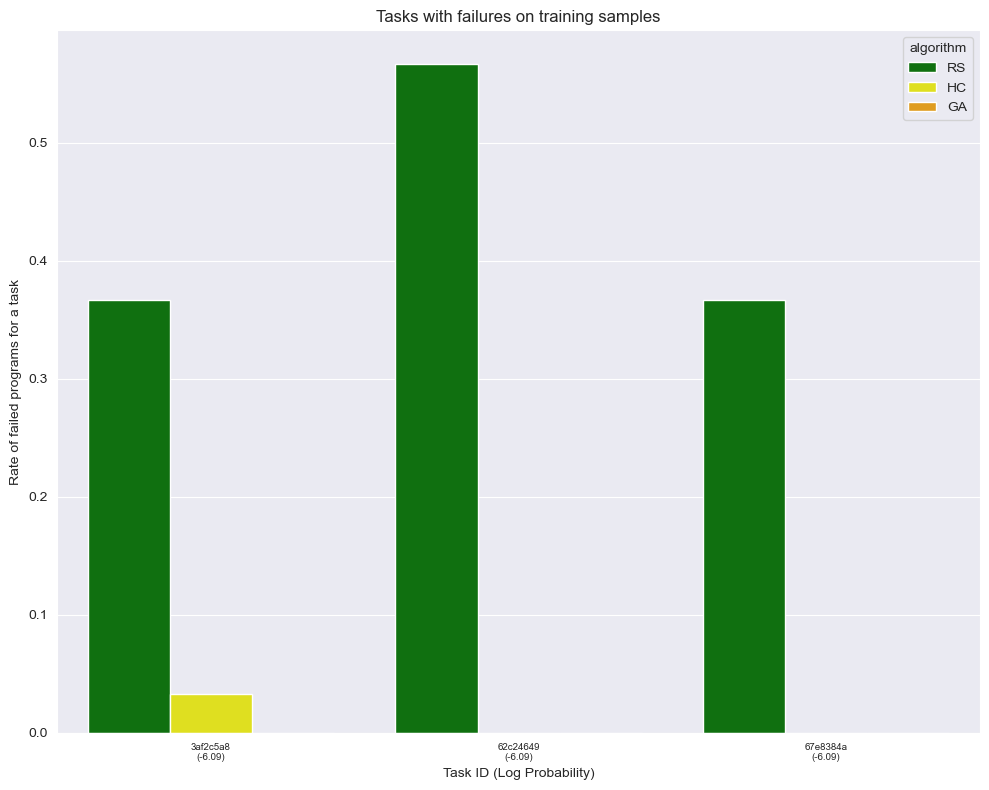

In [94]:
# barplot
training_or_test = "training"
df_sns = pd.DataFrame.from_dict(dict_sns)
df_sns = df_sns[df_sns["task_id"].str.endswith("(%s)" % training_or_test)]

# we need a custom palette, to make it coherent with the other figure
palette = {'RS' : 'green', 'HC' : 'yellow', 'GA' : 'orange'}

# also a custom order, in growing negative log probability
custom_order = sorted([t for t in df_sns["task_id"].unique()], key=lambda x : task_complexity[x.split("\n")[0]][1], reverse=True)

fig, ax = plt.subplots(figsize=(10,8))
sns.barplot(df_sns, x="task_id", y="failures", hue="algorithm", palette=palette, order=custom_order, ax=ax)
ax.set_title("Tasks with failures on %s samples" % training_or_test)
ax.set_ylabel("Rate of failed programs for a task")
ax.set_xlabel("Task ID (Log Probability)")

# create new, more readable labels
new_xlabels = [ x.get_text().split("\n")[0] for x in ax.get_xticklabels() ]
new_xlabels = [ x + "\n" + str("(%.2f)" % task_complexity[x][1]) for x in new_xlabels ]
ax.set_xticklabels(new_xlabels, fontsize=7)

fig.tight_layout()

plt.savefig("../local/figures/task_failures_%s.png" % training_or_test, dpi=150)